In [2]:
import pandas as pd


In [10]:
df = pd.read_excel('svc_points.xlsx')
df.head()

,date,hour,points
0,2022-12-12,22,3360
1,2022-12-11,22,30
2,2022-12-11,22,140
3,2022-12-11,22,80
4,2022-12-11,22,80


# EDA

######  process
<ul>
    <li>#1. inspect individual years separately</li>
    <li>#2. create 2 separate df, one to study relationship between the hour and points</li>
    <li>#3. perfom TSA on the other df</li>
</ul>

In [14]:
df.describe()

,date,hour,points
count,684,684.000000,684.000000
mean,2023-11-04 00:50:31.578947328,17.285088,8740.812865
min,2022-11-16 00:00:00,4.000000,1.000000
25%,2023-05-21 12:00:00,13.000000,4620.000000
50%,2023-10-31 12:00:00,18.000000,7350.000000
75%,2024-04-29 00:00:00,21.000000,11550.000000
max,2024-10-03 00:00:00,23.000000,76639.000000
std,NaN,4.378740,6406.081138


In [16]:
df.points.unique()

array([ 3360,    30,   140,    80,   120,    20,   100,  5460,  4410,
        7560,  6090,  4200,  3570,  4620,  5880,  6720,  3990,  5250,
        7140,  5040,  5670,  8190,  6930, 10290, 10920, 12180, 14700,
        9450, 21840, 19320, 18480, 25200, 17640, 22470, 14910, 22680,
       10500, 12600, 14280,  9240, 15750, 10080,  8610, 11130,  7350,
        6510,  4830,  3150,  2730,  8400,  6300,  4000, 16380, 13440,
       15960, 17220, 11760, 15120, 11970, 21000, 17850, 18060, 20580,
        9870,   210,  7980,  2940,  7770,  3780,  2520,  1380,  8820,
        1890,  9030, 16800, 13230, 14490, 12810, 13860, 13020, 15330,
       11340,  1470,  2100, 11550, 19110, 20160,  9660,  2310,   160,
         420,   690, 16000, 13200,    40, 14070, 13650,  5760,     1,
       15540, 16590, 19740, 18690, 10710, 19530, 37590, 18900, 22260,
       22050, 20370,  1680,  5600,  3640,  2880,  5320,  2280,  1260,
          70, 21420, 20790, 17010, 23100, 23310, 22890, 23730, 27930,
       24360,  2681,

In [40]:
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df['is_weekend'] = df['date'].dt.weekday >= 5
df.head()

,date,hour,points,month,day,is_weekend
0,2022-12-12,22,3360,12,12,False
1,2022-12-11,22,30,12,11,True
2,2022-12-11,22,140,12,11,True
3,2022-12-11,22,80,12,11,True
4,2022-12-11,22,80,12,11,True


In [38]:
df.corr()

,date,hour,points,month,day,is_weekend
date,1.000000,-0.066784,0.321237,0.091821,0.223403,0.021682
hour,-0.066784,1.000000,-0.077834,-0.040260,-0.118808,0.100016
points,0.321237,-0.077834,1.000000,0.183269,0.073712,-0.033934
month,0.091821,-0.040260,0.183269,1.000000,0.022339,0.065100
day,0.223403,-0.118808,0.073712,0.022339,1.000000,0.028619
is_weekend,0.021682,0.100016,-0.033934,0.065100,0.028619,1.000000


# Visualizaiton

In [53]:
import matplotlib.pyplot as plt

### Distribution of points over the years

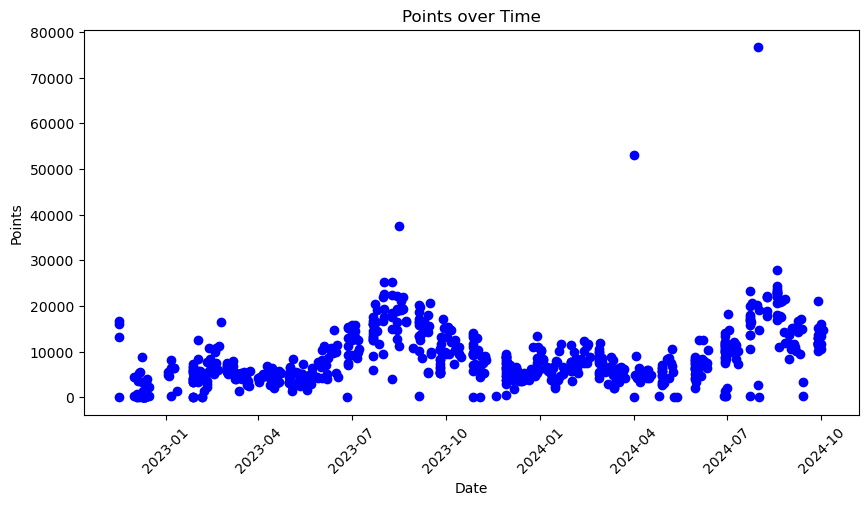

In [44]:
plt.figure(figsize=(10, 5))
plt.scatter(df['date'], df['points'], color='blue')
plt.title('Points over Time')
plt.xlabel('Date')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.show()

### Distribution of points per hour

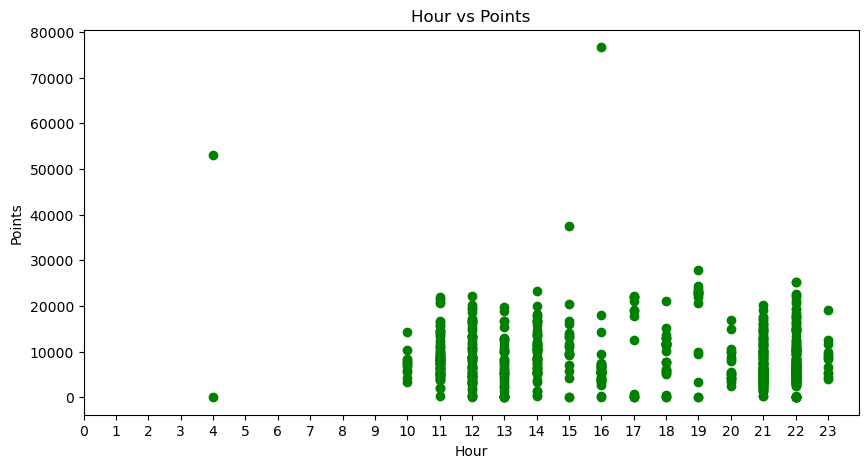

In [46]:
plt.figure(figsize=(10, 5))
plt.scatter(df['hour'], df['points'], color='green')
plt.title('Hour vs Points')
plt.xlabel('Hour')
plt.ylabel('Points')
plt.xticks(range(0, 24))  # Set x-axis ticks to each hour of the day
plt.show()

### Distribution of points per day of the month

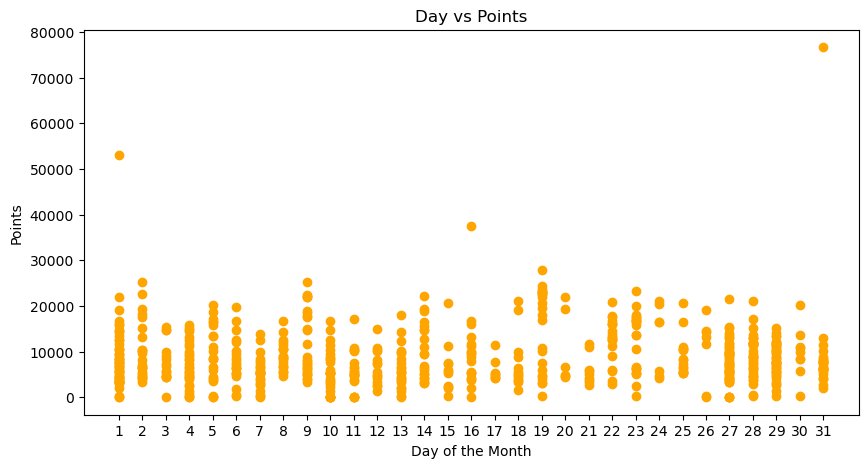

In [48]:
plt.figure(figsize=(10, 5))
plt.scatter(df['day'], df['points'], color='orange')
plt.title('Day vs Points')
plt.xlabel('Day of the Month')
plt.ylabel('Points')
plt.xticks(range(1, 32))  # Assuming day ranges from 1 to 31
plt.show()

In [78]:
outliers_top = df.sort_values(by='points', ascending=False)
outliers = outliers_top.head(3)

outliers.head()

,date,hour,points,month,day,is_weekend
561,2024-07-31,16,76639,7,31,False
636,2024-04-01,4,53130,4,1,False
413,2023-08-16,15,37590,8,16,False


In [80]:
df_cleaned = df[~df.isin(outliers)].dropna()

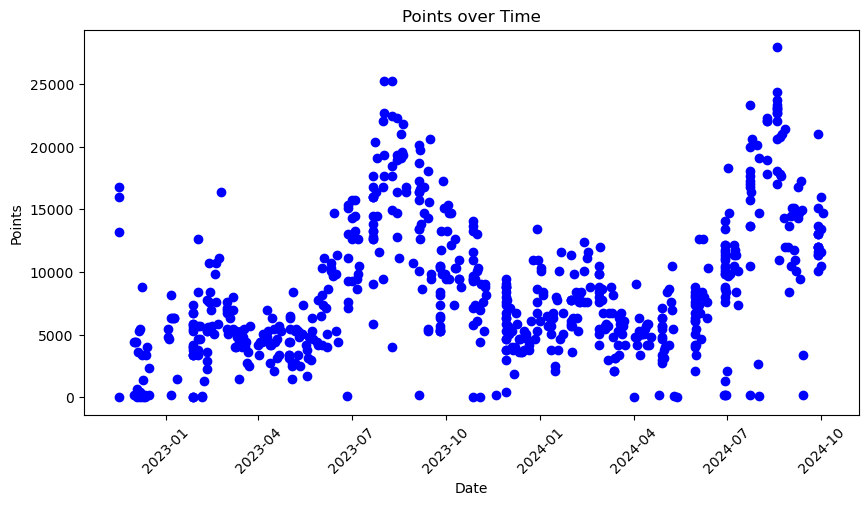

In [84]:
plt.figure(figsize=(10, 5))
plt.scatter(df_cleaned['date'], df_cleaned['points'], color='blue')
plt.title('Points over Time')
plt.xlabel('Date')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.show()

In [6]:
df_cleaned.corr()

NameError: name 'df_cleaned' is not defined

# EDA 

In [4]:
! pip install matplotlib
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/d2/92/c2b9464a0562feb6ae780bdc152364810862e07ef5e6affa2b7686028db2/matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/0c/89/9830ba00d88e43d15e53d64931e66b8792b46eb25e2050a88fec4a0df3d5/contourpy-1.3.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/b9/0a/a57caaff3bc880779317cb157e5b49dc47fad54effe027016abd355b0651/fonttools-4.54.1-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/167.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/167.0 kB ? eta -:--

In [5]:
# Plot Points over Time
plt.figure(figsize=(10, 5))
plt.plot(df_cleaned['date'], df_cleaned['points'], marker='o', linestyle='-', color='blue')
plt.title('Points over Time')
plt.xlabel('Date')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.show()

NameError: name 'df_cleaned' is not defined

<Figure size 1000x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(8, 5))
df_cleaned.boxplot(column='points', by='is_weekend')
plt.title('Points Distribution: Weekday vs. Weekend')
plt.suptitle('')  # Remove the automatic title
plt.xlabel('Is Weekend (1=Yes, 0=No)')
plt.ylabel('Points')
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(df_cleaned['hour'], df_cleaned['points'], color='green')
plt.title('Hour vs Points')
plt.xlabel('Hour')
plt.ylabel('Points')
plt.xticks(range(0, 24))
plt.show()

In [ ]:
# Plot Daily Points Distribution
plt.figure(figsize=(10, 5))
plt.scatter(df_cleaned['day'], df_cleaned['points'], color='orange')
plt.title('Day of the Month vs Points')
plt.xlabel('Day of the Month')
plt.ylabel('Points')
plt.xticks(range(1, 32))
plt.show()

#### Seasonalty Check

In [ ]:
monthly_points = df_cleaned.groupby(df_cleaned['date'].dt.month)['points'].mean()

# Plot Average Points per Month
plt.figure(figsize=(10, 5))
monthly_points.plot(kind='bar', color='purple')
plt.title('Average Points per Month')
plt.xlabel('Month')
plt.ylabel('Average Points')
plt.show()

#### Autocorrelation check

In [ ]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 5))
autocorrelation_plot(df_cleaned['points'])
plt.title('Autocorrelation of Points')
plt.show()